In [10]:
!pip install faker

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
import json

# from google.colab import drive
# drive.mount("/content/drive")

/var/folders/wy/hn7gr__x2yg_fd53bwmfc7p40000gn/T/ipykernel_22350/3484255625.py:51: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(["Hashtag"])["Likes",'Retweets'].sum().reset_index()


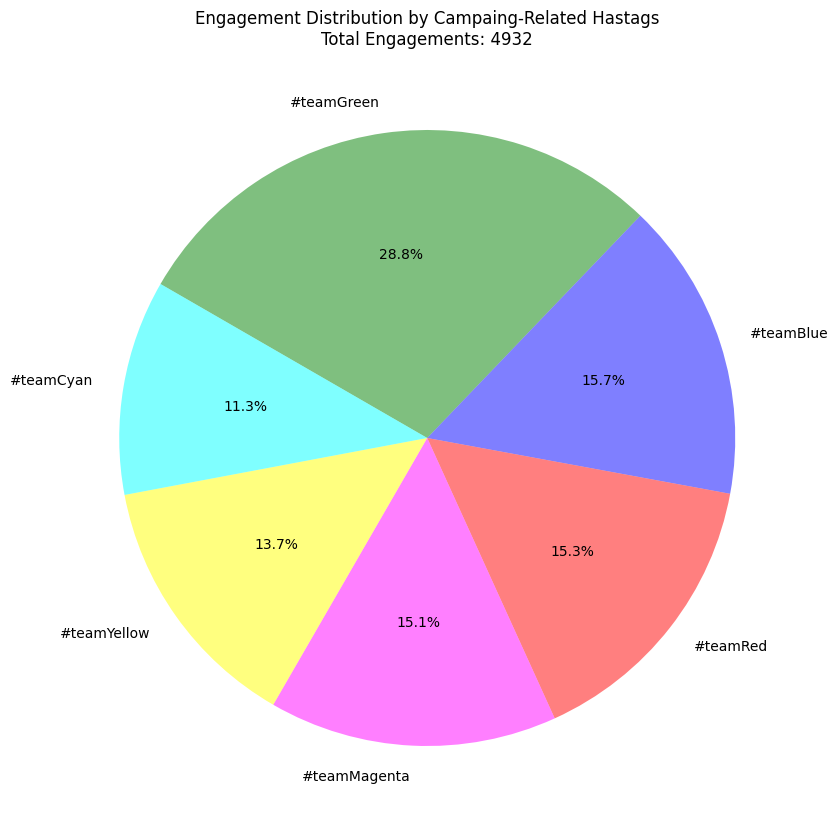

In [12]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# ลบ colums ที่ไม่ได้ใช้ออก เพื่อให้ข้อมูลดูง่าย
data = data.drop(data.columns[0:len(data.columns)-3], axis=1)

# ลบ rows ที่ ไม่มี hashtag หรือที่แสดงค่า none
data = data.dropna()

# ตรวจสอบ rows ที่มีคำว่า team ถ้ามีขึ้น TRUE ถ้าไม่มีขึ้นFLASE จากนั้นเก็บไว้ในตัวแปร is_team
is_team = data["Hashtag"].str.contains("team")

# เอาแต่ rows ที่มีคำว่า team
data = data[is_team]

# สร้าง list จำลองขึ้นมาเพื่อเปลี่ยน ข้อความใน colums: "Hashtag"
hashtag_list = data['Hashtag'].tolist()

# วนลูปเพื่อแก้ไข ข้อความให้เหลือแค่ team_สี_
for i in range(0,len(hashtag_list)):
  if ',' in hashtag_list[i]:
    x = hashtag_list[i].split(',')
    hashtag_list[i] = x[0]

# นำ list จำลองที่สร้างขึ้นมาแทนที่ colums: "Hashtag"
data['Hashtag'] = hashtag_list

# รวมกลุ่ม ที่ team สีเดียวกันเข้าด้วยกัน
data = data.groupby(["Hashtag"])["Likes",'Retweets'].sum().reset_index()

# รวม Engagement และเก็บไว้ใน columns [Engagement]
data["TotalEngagement"]=data['Likes']+data['Retweets']

#เรียง Engagement ที่มากที่สุดไว้ข้างบน
data = data.sort_values(by="TotalEngagement", ascending=False)



# สร้างกราฟ

# กำจัดข้อมูลที่ เป็น 0 ออก
data_graph = data.drop(data[data["TotalEngagement"] == 0].index, inplace=False, axis=0)

# กำหนด ชื่อ ทีม และกำหนดสี ที่จะใช้ในการสร้างกราฟ

label = [] # สร้าง List กำหนดชื่อทีม
color = [] # สร้าง List กำหนดชื่อสี
data_label = data_graph['Hashtag'].tolist() # แปลงข้อมูล ทีม มาเป็น List
# วนลูป เก็บชื่อทีม และ สี
for i in range(0,len(data_label)):
  word = data_label[i].replace('team','') # ทำให้ข้อความที่ วนลูป เหลือแค่ สี
  label.append('#team'+word) # เพิ่มชื่อ ทีม ลงใน list
  color.append(word) # เพิ่มสีลงใน list

total = sum(data_graph["TotalEngagement"]) # รวม Engagement ทั้งหมด

# กำหนด ขนาด กราฟวงกลม
plt.figure(figsize=(10, 10))
# สร้างกราฟวงกลม
plt.pie(data_graph['TotalEngagement'], labels=label, autopct='%1.1f%%', startangle=150, colors=color, counterclock=False,wedgeprops={'alpha': 0.5})
# กำหนด ชื่อกราฟ + รวม Engagement
plt.title("Engagement Distribution by Campaing-Related Hastags"+"\n"+"Total Engagements: "+str(total))



# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()